# Practical exam

In [176]:
### Please state your name here: MARCUS CRISTIAN-VIOREL

In [ ]:
# make sure requirements are up to date
%pip install --upgrade pip >> results/requirements_log.txt
%pip install -r ../requirements.txt >> results/requirements_log.txt

### 1.

Given the below snippet, add the necessary code lines in function f2 in order to obtain the expected output:

In [177]:
def f2(n):
    for i in range(1, n):
        print(f"~~~ {i}")
        yield str({'cubed': i**3}) + '\n' + str({'squared': i**2})
        print(f"@@@ {i}")


n = 5
for x in f2(n):
    print(x)

~~~ 1
{'cubed': 1}
{'squared': 1}
@@@ 1
~~~ 2
{'cubed': 8}
{'squared': 4}
@@@ 2
~~~ 3
{'cubed': 27}
{'squared': 9}
@@@ 3
~~~ 4
{'cubed': 64}
{'squared': 16}
@@@ 4


Expected output:

```
~~~ 1
{'cubed': 1}
{'squared': 1}
@@@ 1
~~~ 2
{'cubed': 8}
{'squared': 4}
@@@ 2
~~~ 3
{'cubed': 27}
{'squared': 9}
@@@ 3
~~~ 4
{'cubed': 64}
{'squared': 16}
@@@ 4
```

### 2.

Under **resources**, there are two input files, [input_file_1.csv](/2022/python_workshop/notebooks/resources/input_file_1.csv) and [input_file_2.csv](/2022/python_workshop/notebooks/resources/input_file_2.csv).

Given the two input files, remove the duplicates.

If rows in all files are combined, there must be NO duplicates. Solution should include 2 functions, one for reading data from files and one for writing data to files. A partial solution without functions is accepted.

Expected output: two separate output files under results/expected, [output_file_1.csv](/2022/python_workshop/notebooks/results/expected/output_file_1.csv) and [output_file_2.csv](/2022/python_workshop/notebooks/results/expected/output_file_2.csv).

In [178]:
import csv
import pandas as pd

def read_data_from_csv(path1, path2):
    # fisierul 1 si deduplicare locala
    df1 = pd.read_csv(path1)
    df1 = df1.drop_duplicates()

    # fisierul 2 si deudplicare locala
    df2 = pd.read_csv(path2)
    df2 = df2.drop_duplicates()

    # deduplicarea fisierului 2 si deduplicare globala (cu fisierul 1)
    df_merge = pd.merge(df1, df2, how='inner')
    df2 = df2.append(df_merge)
    df2['Duplicated'] = df2.duplicated(keep=False)
    df2 = df2[~df2['Duplicated']]
    del df2['Duplicated']

    return df1, df2
    


def write_data_in_csv(path1, path2, data1, data2):
    data1.to_csv(path1, index=False)
    data2.to_csv(path2, index=False)



df1, df2 = read_data_from_csv("./resources/input_file_1.csv", "./resources/input_file_2.csv")
write_data_in_csv("./results/expected/output_file_1.csv", "./results/expected/output_file_2.csv", df1, df2)

C:\Users\Laptop 9\AppData\Local\Temp\ipykernel_8184\2823702214.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df_merge)


### 3.

Using the [data.gov.ro](https://data.gov.ro/dataset/acreditarea-unitatilor-sanitare-2021) API, extract the "accredited hospitals 2021" data set (link available below).

Alternatively, if the API is down, use the backup file **hospitals.csv** from the **resources** folder as a source.

In [179]:
import requests
import pandas as pd

In [180]:
url_hospitals = 'https://data.gov.ro/dataset/4197b53e-7c91-4fcc-be07-883076d40ffc/resource/7a343719-d625-4b5c-98b5-895a684d61c4/download/anmcs-acreditare-unitati-sanitare-dec2021.json'

response = requests.get(url_hospitals)
json = response.json()
hospitals = pd.DataFrame(json)

hospitals.head()

,Nr. Crt.,Nume,Cod A.N.M.C.S.,Judet,Clasificare,TIP USP (in functie de specificul patologiei tratate),TIP USP (in functie de regimul proprietatii),TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale),Adresa completa a sediului principal,Adresa email oficiala,Website,Autoritatea tutelara,Acreditare ciclul I,Acreditare ciclul II,,__1,__2
0,1,SPITALUL MUNICIPAL CALAFAT,A001,Dolj,IV,general,public,fara invatamant,"B-dul. T. Vladimirescu, Nr. 24, Calafat, cod 2...",spitalcalafat@gmail.com,spitalcalafat.ro,PRIMARIA MUNICIPIULUI CALAFAT,Acreditat,Categoria V Decizie de prelungire a procesului...,,,
1,2,SPITALUL DE PSIHIATRIE CRONICI SCHITU GRECI,A002,Olt,V,afectiuni cronice,public,fara invatamant,SLATINA STR. A. I. CUZA NR. 14,spitalulschitu@gmail.com,www.spitalul-schitu.ro,CONSILIUL JUDETEAN OLT,Acreditat,Categoria V Decizie de prelungire a procesului...,,,
2,3,SPITALUL CLINIC NICOLAE MALAXA,A003,Bucuresti,III,general,public,clinic cu sectii universitare,"STR. DIMITRIE CANTEMIR, NR.1, PARTER, SECT.4, ...",secretariat@spitalmalaxa.ro,www.spitalmalaxa.ro,ASSMB,Acreditat,Categoria IV Acreditat cu incredere redusa,,,
3,4,"SPITALUL MILITAR DE URGENTA ""REGINA MARIA"" BRA?OV",A004,Brasov,III,urgenta,public,fara invatamant,"Bucuresti, Str. Institutul Medico-Militar, Nr....",smureginamaria@rdsbv.ro,www.smubrasov.ro,DIRECtIA MEDICALa a Ministerului Apararii Nati...,Acreditat,Categoria II Acreditat cu recomandari,,,
4,5,SPITALUL ORASENESC INEU,A005,Arad,IV,general,public,fara invatamant,"Calea Republicii, nr. 5",spitalineu@yahoo.ro,http://www.spitalineu.ro,Primaria Orasului Ineu,Acreditat,Categoria V Decizie de prelungire a procesului...,,,


How many rows are in this dataset?

In [181]:
hospitals.shape[0]

1365

What are the columns in this dataset?

In [182]:
hospitals.columns

Index(['Nr. Crt.', 'Nume', 'Cod A.N.M.C.S.', 'Judet', 'Clasificare',
       'TIP USP (in functie de specificul patologiei tratate)',
       'TIP USP (in functie de regimul proprietatii)',
       'TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale)',
       'Adresa completa a sediului principal', 'Adresa email oficiala',
       'Website', 'Autoritatea tutelara', 'Acreditare ciclul I',
       'Acreditare ciclul II', '', '__1', '__2'],
      dtype='object')

Drop the unnecessary columns:
* Nr. Crt.
* TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale)
* the last three columns

In [183]:
hospitals.drop(['Nr. Crt.', 'TIP USP (din punct de vedere al invatamantului si al cercetarii stiintifice medicale)'], axis=1, inplace=True)
hospitals.drop(columns=hospitals.columns[-3:], axis=1, inplace=True)

Apply the following transformations to the columns, so that they are easier to work with:
* lowercase all columns
* `TIP USP (in functie de specificul patologiei tratate)` rename to `tip_patologie`
* `TIP USP (in functie de regimul proprietatii)` rename to `tip`
* `Adresa completa a sediului principal` rename to `adresa`
* `Adresa email oficiala` rename to `email`
* `Autoritatea tutelara` rename to `autoritate_tutelara`
* `Acreditare ciclul I` rename to `acreditare_i`
* `Acreditare ciclul II` rename to `acreditare_ii`

In [186]:
hospitals = hospitals.rename(columns=lambda x: x.lower())
hospitals.rename(
    columns={
        'tip usp (in functie de specificul patologiei tratate)': 'tip_patologie',
        'tip usp (in functie de regimul proprietatii)': 'tip',
        'adresa completa a sediului principal': 'adresa',
        'adresa email oficiala': 'email',
        'autoritatea tutelara': 'autoritate_tutelara',
        'acreditare ciclul i': 'acreditare_i',
        'acreditare ciclul ii': 'acreditare_ii'
    },
    inplace=True
)
hospitals.head()



,nume,cod a.n.m.c.s.,judet,clasificare,tip_patologie,tip,adresa,email,website,autoritate_tutelara,acreditare_i,acreditare_ii
0,SPITALUL MUNICIPAL CALAFAT,A001,Dolj,IV,general,public,"B-dul. T. Vladimirescu, Nr. 24, Calafat, cod 2...",spitalcalafat@gmail.com,spitalcalafat.ro,PRIMARIA MUNICIPIULUI CALAFAT,Acreditat,Categoria V Decizie de prelungire a procesului...
1,SPITALUL DE PSIHIATRIE CRONICI SCHITU GRECI,A002,Olt,V,afectiuni cronice,public,SLATINA STR. A. I. CUZA NR. 14,spitalulschitu@gmail.com,www.spitalul-schitu.ro,CONSILIUL JUDETEAN OLT,Acreditat,Categoria V Decizie de prelungire a procesului...
2,SPITALUL CLINIC NICOLAE MALAXA,A003,Bucuresti,III,general,public,"STR. DIMITRIE CANTEMIR, NR.1, PARTER, SECT.4, ...",secretariat@spitalmalaxa.ro,www.spitalmalaxa.ro,ASSMB,Acreditat,Categoria IV Acreditat cu incredere redusa
3,"SPITALUL MILITAR DE URGENTA ""REGINA MARIA"" BRA?OV",A004,Brasov,III,urgenta,public,"Bucuresti, Str. Institutul Medico-Militar, Nr....",smureginamaria@rdsbv.ro,www.smubrasov.ro,DIRECtIA MEDICALa a Ministerului Apararii Nati...,Acreditat,Categoria II Acreditat cu recomandari
4,SPITALUL ORASENESC INEU,A005,Arad,IV,general,public,"Calea Republicii, nr. 5",spitalineu@yahoo.ro,http://www.spitalineu.ro,Primaria Orasului Ineu,Acreditat,Categoria V Decizie de prelungire a procesului...


The total number of hospitals in this dataset is 762, however the actual number of rows is greater than that.

Identify and remove the empty (blank space) rows.

In [187]:
import numpy as np

hospitals.replace('', np.nan, regex=True)
print(hospitals.isna().value_counts()) # indentified
hospitals.dropna(how='all', inplace=True) # removed

nume   cod a.n.m.c.s.  judet  clasificare  tip_patologie  tip    adresa  email  website  autoritate_tutelara  acreditare_i  acreditare_ii
False  False           False  False        False          False  False   False  False    False                False         False            1365
dtype: int64


How many public hospitals and how many private hospitals are in this dataset?

In [188]:
res = hospitals[hospitals['tip'] == 'public'].value_counts().count()
print(res)
res = hospitals[hospitals['tip'] == 'privat'].value_counts().count()
print(res)

380
382


Inspect the values in the `acreditare_i` column + print them.

In [189]:
print(hospitals['acreditare_i'].drop_duplicates())

0        Acreditat
188    Neacreditat
424              -
762               
Name: acreditare_i, dtype: object


Create a dataframe containing the hospitals that are *not* accredited.

In [201]:
new_df = hospitals[hospitals['acreditare_i'] == 'Neacreditat']
print(new_df)

                          nume cod a.n.m.c.s.   judet   clasificare  \
188   SOCIETATEA DR IRIMIA SRL         A50009   Arges  Neclasificat   
214  SPITALUL ORASENESC FAUREI         A50035  Braila             V   

    tip_patologie     tip                           adresa  \
188       general  privat  PITESTI, str.Negru Voda, nr.3-5   
214       general  public             STR.REPUBLICII,NR.46   

                        email              website     autoritate_tutelara  \
188     infodririmia@yahoo.ro      www.dririmia.ro        SC DR.IRIMIA SRL   
214  spit_or_faurei@yahoo.com  www.spitalfaurei.ro  CONSILIUL LOCAL FAUREI   

    acreditare_i                           acreditare_ii  
188  Neacreditat  Unitate aflata in proces de acreditare  
214  Neacreditat                Categoria VI Neacreditat  


How many hospitals are *not* accredited?

In [191]:
new_df.count()[0]

2

Pick a county (judet) for a more in-depth analysis.
(Bucuresti is also a county)

In [192]:
judet = 'Bucuresti'

According to this dataset, how many hospitals are in this county?

In [193]:
hospitals[hospitals['judet'] == judet].count()[0]

106

For the chosen county, create a Dataframe that contains the following information:
* judet
* tip (public, privat)
* count of unaccredited hospitals
* count of accredited hospitals

In [194]:
stat = hospitals[hospitals['judet'] == judet]
stat = stat.assign(
    acreditat = lambda x: x.acreditare_i == 'Acreditat',
    neacreditat = lambda x: x.acreditare_i == 'Neacreditat'
)

stat['acreditat'] = stat['acreditat'].astype(int)
stat['neacreditat'] = stat['neacreditat'].astype(int)

stat = stat[['judet', 'tip', 'acreditat', 'neacreditat']]

Create a plot that highlights
* the number of accredited public hospitals
* the number of accredited private hospitals
* the number of unaccredited public hospitals
* the number of unaccredited private hospitals

The expected output for Bucuresti can be found  [here](/2022/python_workshop/notebooks/results/expected/output_test.png).

In [195]:
plot_acreditat = stat.pivot_table(index="tip", values="acreditat", aggfunc="sum")

<AxesSubplot:xlabel='tip'>

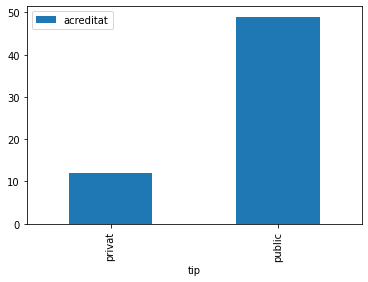

In [196]:
plot_acreditat.plot(kind="bar")

In [197]:
plot_neacreditat = stat.pivot_table(index="tip", values="neacreditat", aggfunc="sum")

<AxesSubplot:xlabel='tip'>

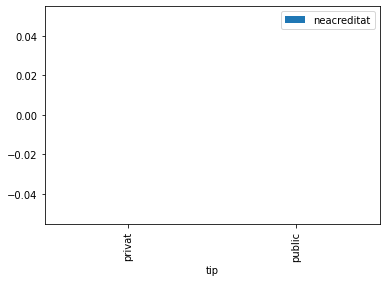

In [198]:
plot_neacreditat.plot(kind="bar")

In [199]:
from functools import reduce

plot_data = reduce(lambda left,right: pd.merge(left,right,on=["tip"], how='inner'), [plot_acreditat, plot_neacreditat])
plot_data.head()

,acreditat,neacreditat
tip,,
privat,12,0
public,49,0


<AxesSubplot:xlabel='tip'>

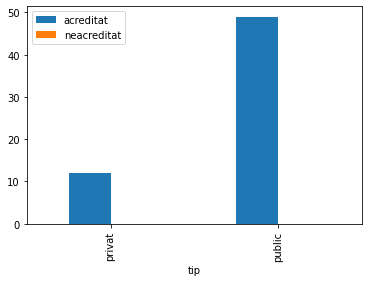

In [200]:
plot_data.plot(kind="bar")